In [2]:
import os
import sys
import glob

In [3]:
sys.path.append('../')

In [4]:
import RegridSami
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
eph_files = np.sort(glob.glob('/petastore/phil/DMSP_INTERPOLATIONS/dmsp-eph/*'))
eph_files

array(['/petastore/phil/DMSP_INTERPOLATIONS/dmsp-eph/F16_eph_13075.txt',
       '/petastore/phil/DMSP_INTERPOLATIONS/dmsp-eph/F16_eph_13076.txt',
       '/petastore/phil/DMSP_INTERPOLATIONS/dmsp-eph/F16_eph_13077.txt',
       '/petastore/phil/DMSP_INTERPOLATIONS/dmsp-eph/F17_eph_13075.txt',
       '/petastore/phil/DMSP_INTERPOLATIONS/dmsp-eph/F17_eph_13076.txt',
       '/petastore/phil/DMSP_INTERPOLATIONS/dmsp-eph/F17_eph_13077.txt',
       '/petastore/phil/DMSP_INTERPOLATIONS/dmsp-eph/F18_eph_13075.txt',
       '/petastore/phil/DMSP_INTERPOLATIONS/dmsp-eph/F18_eph_13076.txt',
       '/petastore/phil/DMSP_INTERPOLATIONS/dmsp-eph/F18_eph_13077.txt'],
      dtype='<U62')

In [6]:
satnames = np.unique([fname.split('/')[-1][:3] for fname in eph_files])
satnames

array(['F16', 'F17', 'F18'], dtype='<U3')

In [15]:
for sat in satnames:
    files_each_sat = [fname for fname in eph_files if sat in fname]
    
    dfs = []
    for fname in files_each_sat:
        dfs.append(pd.read_fwf(fname))
    sat_df = pd.concat(dfs).reset_index(drop=True)
    
    sat_df['time'] = [pd.Timestamp(str(sat_df['Year'][i]) + '-01-01') + pd.Timedelta(sat_df['DOY'][i]-1, unit='d') + pd.Timedelta(sat_df['UT(sec)'][i], unit='s') for i in range(len(sat_df))]
    
    RegridSami.do_interpolations('/petastore/phil/Prasoon_satellite_project/more_runs/20130317/sami-gitm-coupled/',
                                 dtime_sim_start='20130316',
                                 out_lat_lon_alt=np.array(sat_df[['GLAT','GLON','ALT']]).T,
                                out_path='/petastore/phil/DMSP_INTERPOLATIONS/interpolated/20130317/',
                                out_runname=sat,
                                sat_times=sat_df.time,
                                cols='edens',
                                save_delauney=False,
                                show_progress=True,
                                return_ds_too=False)


Found existing triangulation file. Recalculating... 
(Specify save_delauney=True to reuse)


Reading in SAMI data:   0%|          | 0/596 [00:00<?, ?it/s]

Found existing triangulation file. Recalculating... 
(Specify save_delauney=True to reuse)


Reading in SAMI data:   0%|          | 0/596 [00:00<?, ?it/s]

Found existing triangulation file. Recalculating... 
(Specify save_delauney=True to reuse)


Reading in SAMI data:   0%|          | 0/596 [00:00<?, ?it/s]

In [16]:
for i in glob.glob('/petastore/phil/DMSP_INTERPOLATIONS/interpolated/20130317/*.nc'):
    ds = xr.open_dataset(i)
    print(np.sum(np.isnan(ds.edens.values)))

0
0
0


In [9]:
ds2 = xr.open_dataset('/petastore/phil/DMSP_INTERPOLATIONS/interpolated/20130317/F16_SAT_INTERP.nc')

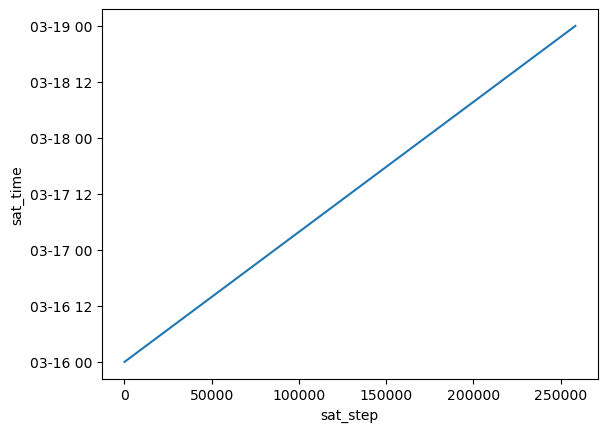

In [10]:

ds2.sat_time.plot()

In [13]:
np.sum(np.isnan(ds2.edens.values)) , np.product(ds2.edens.values.shape)

(0, 154070768)

In [14]:
ds2.close()